# 7_2. Tuning parameters of GB with TOMEK

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/TOMEK/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/TOMEK/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/TOMEK/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/TOMEK/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0

y_train['churn'] =y_train['churn'].astype('int64')


y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0

y_test['churn'] =y_test['churn'].astype('int64')


In [3]:
#set the high-parameter

param_grid = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [100, 125,150,175],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 3, 5],
    'max_depth':[10,15,20],
    'max_features': ['sqrt'] # round(sqrt(#cols))
    }
kappa_scorer = make_scorer(cohen_kappa_score)
gb = GradientBoostingClassifier(random_state=12345)

# make_scorer(error_metric_kappa)
grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20,  scoring=kappa_scorer)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.464) total time=   7.1s
[CV 5/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.992, test=0.602) total time=   9.4s
[CV 2/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.992, test=0.566) total time=   5.6s
[CV 5/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.595) total time=   7.8s
[CV 3/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 3/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.995, test=0.550) total time=   5.5s
[CV 4/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.995, test=0.542) total time=   7.7s
[CV 2/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 2/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.994, test=0.550) total time=   5.7s
[CV 2/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.992, test=0.552) total time=   9.5s
[CV 4/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 4/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.991, test=0.590) total time=   5.6s
[CV 1/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.994, test=0.551) total time=   9.6s
[CV 5/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 5/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.994, test=0.544) total time=   7.0s
[CV 4/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.995, test=0.537) total time=   9.5s
[CV 3/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.991, test=0.465) total time=   5.7s
[CV 3/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.992, test=0.473) total time=   9.6s
[CV 1/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.567) total time=   7.2s
[CV 1/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 1/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.994, test=0.549) total time=  11.5s
[CV 4/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 4/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 67/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150
[CV 4/5; 67/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=(train=0.995, test=0.553) total time=  13.0s
[CV 2/5; 69/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 69/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.992, test=0.562) total time=   8.0s
[CV 3/5; 70/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 3/5; 70/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 72/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175
[CV 4/5; 72/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175;, score=(train=0.995, test=0.555) total time=  11.7s
[CV 3/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 74/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.467) total time=   9.2s
[CV 1/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 1/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 74/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.572) total time=   8.9s
[CV 5/5; 75/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 75/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.992, test=0.585) total time=  10.5s
[CV 3/5; 77/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 77/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 75/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 75/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.995, test=0.545) total time=  10.7s
[CV 2/5; 77/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 77/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.990, test=0.555) total time=   5.7s
[CV 2/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 2/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 1/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.994, test=0.532) total time=   7.8s
[CV 4/5; 79/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 4/5; 79/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.995, test=0.547) total time=   9.0s
[CV 2/5; 81/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 2/5; 81/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=3, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 74/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.595) total time=   9.1s
[CV 3/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 3/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.992, test=0.469) total time=  12.0s
[CV 3/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 3/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 70/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 4/5; 70/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.995, test=0.557) total time=   8.4s
[CV 2/5; 72/288] START criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175
[CV 2/5; 72/288] END criterion=friedman_mse, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175;, score=(train=0.992, test=0.556) total time=  11.4s
[CV 4/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_sp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 4/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.995, test=0.537) total time=  12.1s
[CV 5/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 5/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.992, test=0.576) total time=   8.1s
[CV 3/5; 80/288] START criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175
[CV 3/5; 80/288] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, min_samples_leaf=1, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 137/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.992, test=0.467) total time=   6.9s
[CV 4/5; 138/288] START criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 4/5; 138/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.995, test=0.541) total time=   8.9s
[CV 2/5; 140/288] START criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=175
[CV 2/5; 140/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=175;, score=(train=0.992, test=0.550) total time=  13.5s
[CV 5/5; 141/288] START criterion=friedman_mse, loss=exponenti

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 141/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.995, test=0.549) total time=   8.2s
[CV 2/5; 143/288] START criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150
[CV 2/5; 143/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.992, test=0.562) total time=  12.6s
[CV 4/5; 144/288] START criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175
[CV 4/5; 144/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175;, score=(train=0.995, test=0.560) total time=  12.9s
[CV 5/5; 146/288] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 147/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.994, test=0.548) total time=   9.4s
[CV 4/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 4/5; 148/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.995, test=0.545) total time=  11.2s
[CV 5/5; 150/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 5/5; 150/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.992, test=0.586) total time=   6.7s
[CV 3/5; 152/288] START criterion=squared_error, loss=log_loss, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 142/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.992, test=0.465) total time=  10.1s
[CV 1/5; 144/288] START criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175
[CV 1/5; 144/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=175;, score=(train=0.994, test=0.539) total time=  14.3s
[CV 5/5; 145/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 145/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.991, test=0.589) total time=   6.2s
[CV 3/5; 147/288] START criterion=squared_error, loss=log_loss, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.574) total time=   7.6s
[CV 5/5; 147/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 147/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.992, test=0.590) total time=  10.0s
[CV 3/5; 149/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 149/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.991, test=0.450) total time=   5.1s
[CV 4/5; 150/288] START criterion=squared_error, loss=log_loss, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 145/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.990, test=0.473) total time=   7.0s
[CV 4/5; 146/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.995, test=0.535) total time=   7.5s
[CV 2/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 2/5; 148/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.992, test=0.575) total time=  11.6s
[CV 1/5; 150/288] START criterion=squared_error, loss=log_loss, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 143/288] END criterion=friedman_mse, loss=exponential, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.995, test=0.546) total time=  12.7s
[CV 2/5; 145/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 145/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.992, test=0.568) total time=   6.7s
[CV 3/5; 146/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.464) total time=   7.6s
[CV 1/5; 148/288] START criterion=squared_error, loss=log_loss, max_de

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 150/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.992, test=0.459) total time=   6.6s
[CV 2/5; 152/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175
[CV 2/5; 152/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175;, score=(train=0.992, test=0.572) total time=  10.1s
[CV 1/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=125
[CV 1/5; 154/288] END criterion=squared_error, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=125;, score=(train=0.990, test=0.548) total time=   5.7s
[CV 4/5; 155/288] START criterion=squared_error, loss=log_loss, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

The parameter: {'criterion': 'friedman_mse', 'loss': 'exponential','max_depth': 15, 'max_features': 'sqrt','min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} was chosen.

####  Cross validation socre - Kappa-

In [4]:
gb1= GradientBoostingClassifier(criterion = 'friedman_mse',
 loss= 'exponential',
 max_depth= 15,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 100)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.5429255087827116 (0.04409851412004942)
[CV 1/5; 210/288] END criterion=squared_error, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.994, test=0.549) total time=   7.9s
[CV 4/5; 211/288] START criterion=squared_error, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150
[CV 4/5; 211/288] END criterion=squared_error, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=(train=0.995, test=0.538) total time=   9.2s
[CV 2/5; 213/288] START criterion=squared_error, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 213/288] END criterion=squared_error, loss=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.992, test=0.546) total time=   6.6s
[CV 3/5; 214/288] START cr

In [5]:
#save the model
gb1.fit(X_train, y_train)

filename = "../models/TOMEK_gb.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(gb1,file)

### Variable Importance 

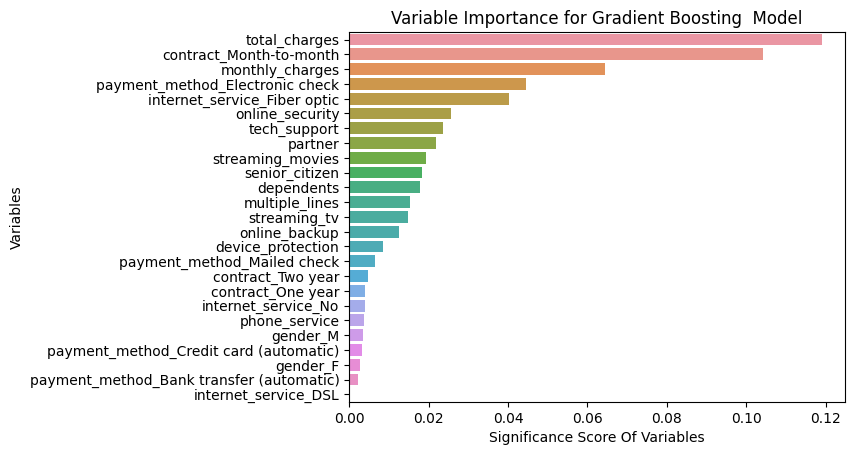

In [6]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()


gb_tuned = gb1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(gb_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


In [7]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.118919
contract_Month-to-month,0.104274


In [8]:
feature_importances_df.to_csv('../data/Significant_Score/TOMEK_GB_Significance_Score.csv', index=False)

### the classification report

In [9]:
from sklearn.metrics import confusion_matrix


y_pred = gb1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[856, 177],
       [160, 214]])

In [10]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1016
1     391
Name: count, dtype: int64

In [11]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = gb1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.760483
1,Precision,0.547315
2,Recall,0.572193
3,F1-Score,0.559477
4,Kappa,0.395118


In [13]:
metrics_df.to_csv('../data/metrics/TOMEK_gb_metrics.csv', index=False)